### Применение пакета Sklearn и представленных в нем алгоритмов машинного обучения

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scist
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [39]:
seed = pd.read_csv("seeds_dataset.txt", sep = ";")
display(seed)

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
207,12.19,NaN,0.8783,5.137,NaN,3.631,4.870,3
208,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
209,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
210,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [40]:
#Поиск и удаление дубликатов
seed.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
seed.drop_duplicates(subset=(seed.columns[: -1]), keep=False, inplace=True, ignore_index=False)
display(seed)

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
207,12.19,NaN,0.8783,5.137,NaN,3.631,4.870,3
208,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
209,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
210,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [41]:
#Поиск пропущенных значений
seed.isna().values.any() 

True

In [42]:
#Поиск неинформативных столбцов: не выявлено
for col in seed.columns:
    pct_missing = np.mean(seed[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100, 5)))

area - 0.0%
perimeter - 0.96154%
compactness - 0.0%
length_of_kernel - 0.0%
width_of_kernel - 0.48077%
asymmetry_coefficient - 0.48077%
length_of_kernel_groove - 0.48077%
class - 0.0%


In [43]:
#Удаление строчек с NaN, переиндексация
seed.dropna(inplace = True)
seed.reset_index(drop = True, inplace=True)
display(seed)

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
200,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,3
201,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
202,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
203,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [44]:
#Пропущенных значений нет
seed.isna().values.any() 

False

In [45]:
#Нормализация и стандартизация данных
X = seed.iloc[:, :-1] 
y = seed.iloc[:, -1]

X_norm = (X - X.mean(axis = 0))/X.std(axis = 0, ddof = 1)
display(X_norm, y)

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
0,0.137599,0.210503,0.002659,0.298470,0.137710,-0.988540,-0.384488
1,0.008033,0.005302,0.429417,-0.170108,0.192946,-1.783767,-0.920637
2,-0.193134,-0.359502,1.439271,-0.759754,0.203467,-0.672565,-1.186681
3,-0.346567,-0.473503,1.037864,-0.685768,0.313938,-0.963421,-1.227298
4,0.437646,0.324504,1.371665,0.063060,0.795277,-1.560998,-0.475877
...,...,...,...,...,...,...,...
200,-0.847781,-0.830706,-0.601563,-0.954807,-0.788143,0.133900,-0.829248
201,-1.236478,-1.279110,-0.838182,-1.098295,-1.222137,0.402280,-0.825186
202,-0.564783,-0.686305,0.733641,-0.883063,-0.072711,3.039815,-0.717550
203,-1.028491,-1.028308,-0.795928,-1.019825,-1.114296,-0.078293,-0.741921


0      1
1      1
2      1
3      1
4      1
      ..
200    3
201    3
202    3
203    3
204    3
Name: class, Length: 205, dtype: int64

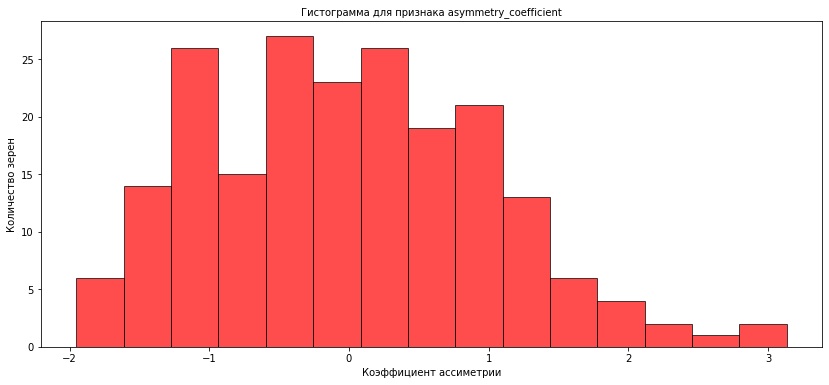

In [49]:
#Построение гистограммы для признака Коэффициента асимметрии
fig, ax = plt.subplots(figsize = (14, 6))
ax.hist(X_norm["asymmetry_coefficient"], bins = 15,  edgecolor = "black", color = "red", alpha= 0.7)
ax.set_title("Гистограмма для признака asymmetry_coefficient", fontsize = 10)
ax.set_xlabel("Коэффициент асимметрии", fontsize = 10)
ax.tick_params(axis = "x", labelsize = 10)
ax.set_ylabel("Количество зерен", fontsize = 10)
ax.tick_params(axis = "y", labelsize = 10)

plt.show()

In [50]:
_, pval = scist.shapiro(seed["asymmetry_coefficient"])

print(pval) #Вывод: меньше 0.05 - не норма, на гистограмме тоже видно, что распределение ненормальное

0.017345484346151352


max_depth_opt = 6 with CV error 0.04904761904761901


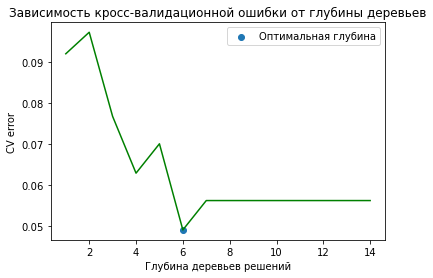

Error train = 0.0
Error test = 0.12903225806451613


In [53]:
#Обучение ансамблем решающих деревьев и выявление оптимальной глубины деревьев на основе кросс-валидационной ошибки
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 777, stratify=y)

n_estimators = 50
max_depth = range(1, 15)

random_forest = RandomForestClassifier(n_estimators = n_estimators, random_state=777)

grid_cv = GridSearchCV(random_forest, param_grid={"max_depth": max_depth}, cv=10 ,scoring="accuracy", n_jobs=-1)
grid_cv.fit(X_train, y_train)

min_cv_mean_err = 1 - grid_cv.best_score_
max_depth_opt = grid_cv.best_estimator_.max_depth
print("max_depth_opt =", n_opt, "with CV error", min_cv_mean_err)

error = 1 - grid_cv.cv_results_["mean_test_score"]
fig, ax = plt.subplots()
ax.plot(max_depth, error, "g")
ax.set_title("Зависимость кросс-валидационной ошибки от глубины деревьев")
ax.set(xlabel="Глубина деревьев решений", ylabel="CV error")
ax.scatter(max_depth_opt, min_cv_mean_err, label = "Оптимальная глубина")
ax.legend()
plt.show()

model_best = RandomForestClassifier(n_estimators = n_estimators, random_state=777, max_depth = max_depth_opt)
model_best.fit(X_train, y_train)

print("Error train =", np.mean(y_train != model_best.predict(X_train)))
print("Error test =", np.mean(y_test != model_best.predict(X_test)))